In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from numba import cuda

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
mnist_digits = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_digits.load_data()

In [4]:
print(train_images.shape , type(train_images))

(60000, 28, 28) <class 'numpy.ndarray'>


In [5]:
def create_model(optimizer='adam'):
	model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])
	# Compile model
	model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

X = train_images
Y = train_labels


In [6]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0, epochs=5)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.942333 using {'optimizer': 'RMSprop'}
0.278717 (0.018859) with: {'optimizer': 'SGD'}
0.942333 (0.002413) with: {'optimizer': 'RMSprop'}
0.881767 (0.006352) with: {'optimizer': 'Adagrad'}
0.417533 (0.042830) with: {'optimizer': 'Adadelta'}
0.927867 (0.005470) with: {'optimizer': 'Adam'}
0.934583 (0.002857) with: {'optimizer': 'Adamax'}
0.930517 (0.004267) with: {'optimizer': 'Nadam'}


In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#with tf.device('/GPU:0'):
model.fit(train_images, train_labels, epochs=5, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 2.6978 - accuracy: 0.8744
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5501 - accuracy: 0.9275
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4928 - accuracy: 0.9418
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4309 - accuracy: 0.9505
Epoch 5/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3959 - accuracy: 0.9551


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.6210 - accuracy: 0.9512


In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


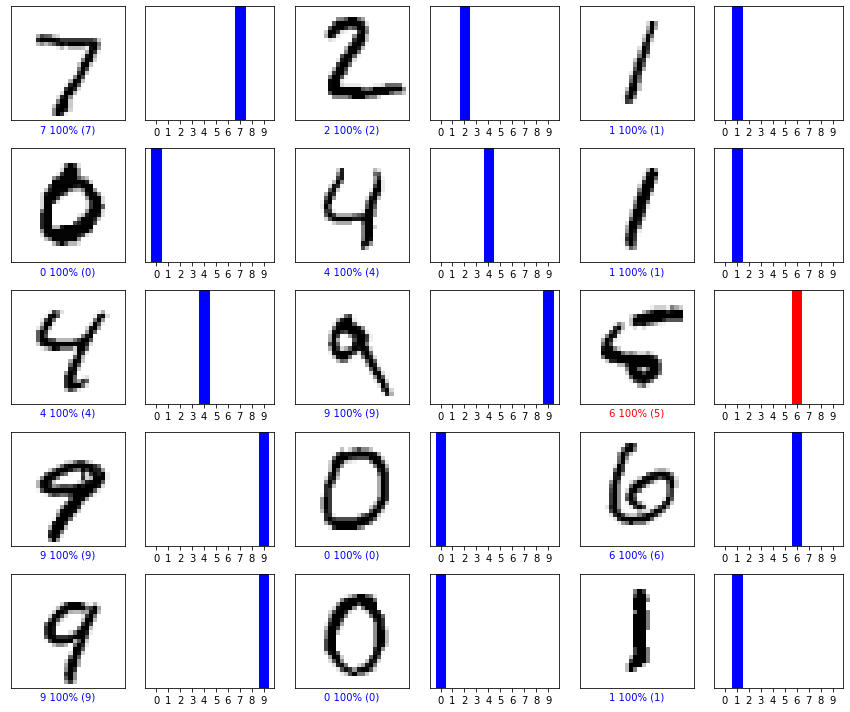

In [12]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
predictions = model.predict(test_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()